# Group Project Proposal

## Title:

#### Analysis of whether living in the the urban or rural areas affected children's academic performance

## Introduction:

A constant concern of every parent is their child's performance in terms of grades. How parent’s resources can shape a child’s achievement academically has been extensively researched and documented by sociologists (Yurk Quadlin, N. 2015). Many parents use their resources to strategically influence children’s educational performance (Bernardi and Grätz, 2015), and that parent’s income levels form a positive relationship with children’s academic performance (Wiborg and Grätz 2022). 

In this report, we will be working on a dataset named “Go To College Dataset” from Kaggle, which is about whether or not students will continue to go to college with each student’s background information. The information for each student includes the type of school that student attended during high school, the quality of school, the gender of the student, whether they lived in urban or rural area, their average grades, etc. In in this report, we will be looking particularly at two columns: whether the students lived in urban or rural area and their average grades. 

Using the programming language R as a tool for our analysis, we will be attempting to answer the research question: 
**Do students living in urban areas perform significantly better in terms of grades than students living in rural areas?**


## Preliminary Results:

In [1]:
# run the initial package
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)
library(stats)
library(dplyr)
options(repr.matrix.max.rows = 6)
library("ggplot2")
library("GGally")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
# Load dataset
# url <- "https://github.com/Zhangcheng0410/stat201/blob/main/data.csv"
# download.file(url, destfile = "data.csv")

# studentset_csv <- read_csv("data.csv")

# studentset

studentset <- read_csv("data.csv")
studentset

Rows: 1000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): type_school, school_accreditation, gender, interest, residence
dbl (4): parent_age, parent_salary, house_area, average_grades
lgl (2): parent_was_in_college, will_go_to_college

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,FALSE,TRUE
Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,FALSE,TRUE
Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,FALSE,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,FALSE,TRUE
Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,TRUE,TRUE
Academic,B,Male,Interested,Urban,50,2940000,69.1,86.13,TRUE,FALSE


In [3]:
# calculate the mean and median of average grades from unban student
student_urban <- studentset%>%
    filter(residence=="Urban")%>%
    select(residence, average_grades)
urban_mean_median <- student_urban%>%
    summarize(mean= mean(average_grades), median=median(average_grades))
head(student_urban)
urban_mean_median 

residence,average_grades
<chr>,<dbl>
Urban,84.09
Urban,86.91
Urban,87.43
Urban,86.79
Urban,84.09
Urban,89.71


mean,median
<dbl>,<dbl>
85.41506,85.09


In [4]:
# calculate the mean and median of average grades from rural student
student_rural <- studentset%>%
    filter(residence=="Rural")%>%
    select(residence, average_grades)
rural_mean_median <- student_rural %>%
    summarize(mean= mean(average_grades), median=median(average_grades))
head(student_rural)
rural_mean_median 

residence,average_grades
<chr>,<dbl>
Rural,82.12
Rural,86.79
Rural,90.39
Rural,84.65
Rural,88.50
Rural,85.43


mean,median
<dbl>,<dbl>
86.89475,86.33


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


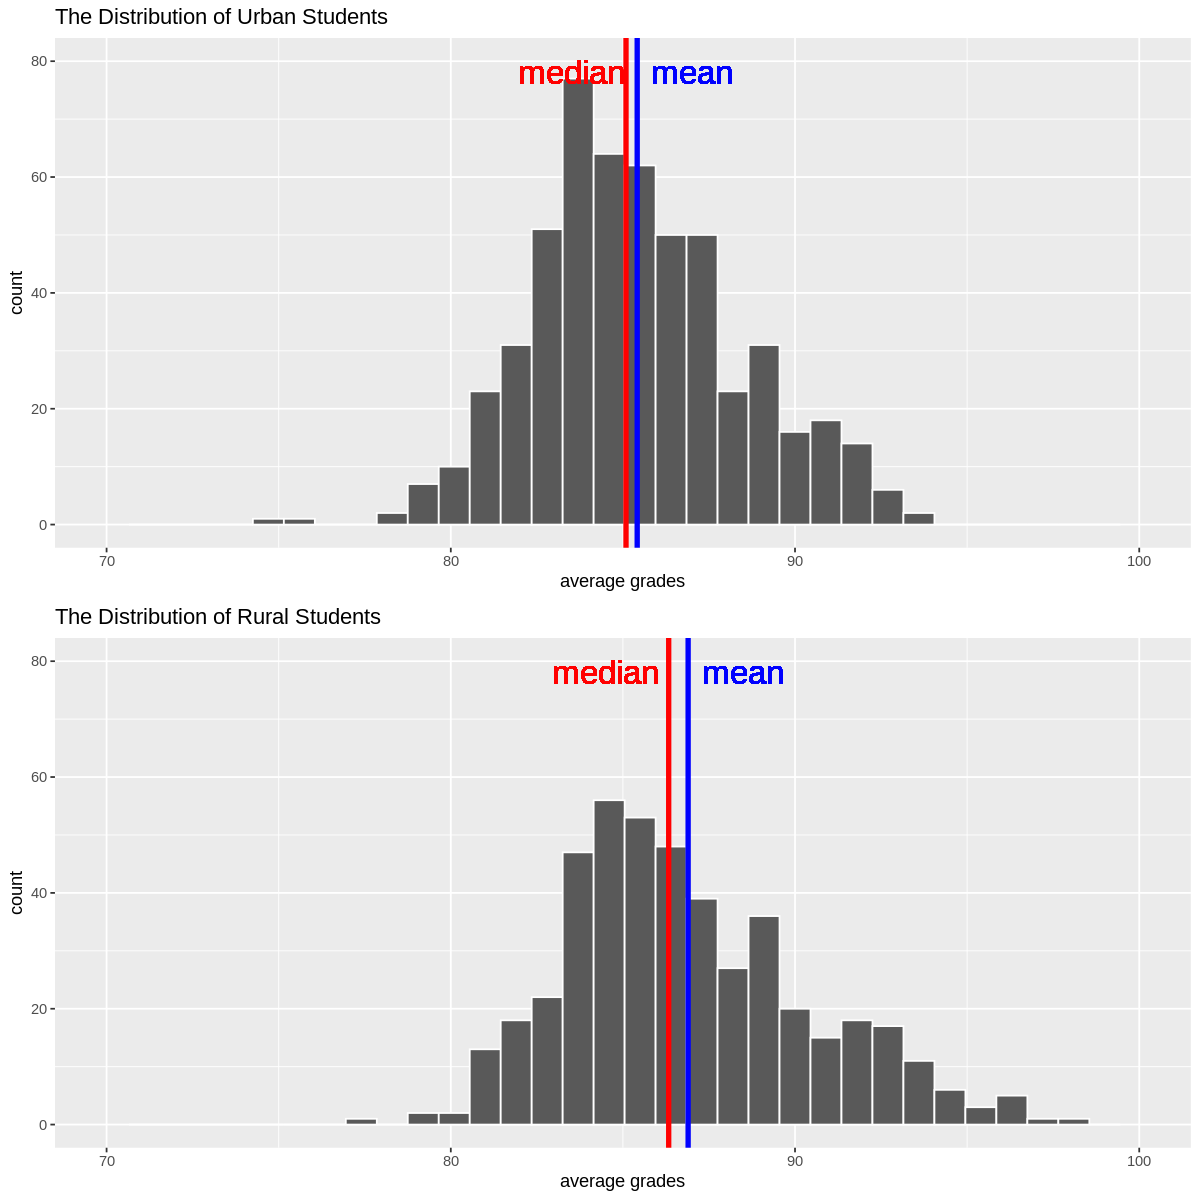

In [5]:
# visualize each median and mean from urban and rural dataset
options(repr.plot.width = 10, repr.plot.height = 10)
urban_plot <- student_urban %>%
    ggplot(aes(x= average_grades))+
    geom_histogram(binwidth=0.9, color="white")+
    labs(title="The Distribution of Urban Students", x="average grades", y="count")+
    geom_vline(xintercept = urban_mean_median$mean,
                color = "blue", size=1.5)+
    geom_text(aes(x=87, y= 80, label = "mean"), colour = "blue", vjust = 1, size = 7)+ 
    geom_vline(xintercept = urban_mean_median$median, 
                color = "red", size=1.5)+
    geom_text(aes(x=83.5, y= 80, label = "median"), colour = "red", vjust = 1, size = 7)

rural_plot <- student_rural %>%
    ggplot(aes(x= average_grades))+
    geom_histogram(binwidth=0.9, color="white")+
    labs(title="The Distribution of Rural Students", x="average grades",y="count")+
    geom_vline(xintercept = rural_mean_median$mean,
                color = "blue", size=1.5)+
    geom_text(aes(x=88.5, y= 80, label = "mean"), colour = "blue", vjust = 1, size = 7)+ 
    geom_vline(xintercept = rural_mean_median$median, 
                color = "red", size=1.5)+
    geom_text(aes(x=84.5, y= 80, label = "median"), colour = "red", vjust = 1, size = 7)

proportion_plot_row <- plot_grid(urban_plot +
                                 scale_x_continuous(limits = c(70, 100)),
                                 rural_plot +
                                 scale_x_continuous(limits = c(70, 100)),
                                 ncol = 1)
means_grid <- plot_grid(proportion_plot_row)
                        # ncol = 1,
                        # rel_heights = c(1, 10))

# urban_plot
# rural_plot
means_grid

In [6]:
# select two useful columns: students' residence and avergae score 
student_total<- studentset%>%
    select(residence, average_grades)


student_total

residence,average_grades
<chr>,<dbl>
Urban,84.09
Urban,86.91
Urban,87.43
⋮,⋮
Urban,79.56
Rural,87.18
Urban,86.13


We want to test if the residence of students (urban and rural) will influence their performance in study (average grade). We guess students from rural have better score than those from urban.

The median and mean of grades of urban and rural students would be most suitable to investigate and ultimately test the our claim. 

We want to study how urban and rural students' grades are different. For now, let us focus on the mean of the average grades. We want to test hypotheses about the mean at the 5% significance level. 

First let's conduct a hypothesis test to examine students' difference average score from urban and rural in mean.

$H_0$: The mean of students' score from rural is same as the mean of students' score from urban.

$H_1$: The mean of students' score from rural is larger than the mean of students' score from urban.

In [7]:
# first calculate the observed test statistic
obs_diff_in_means <- 
    student_total%>%
    specify(formula=average_grades~residence)%>%
    calculate(stat= "diff in means", order= c("Rural", "Urban"))
obs_diff_in_means

stat
<dbl>
1.479686


## Methods: Plan

Methods:
we will simulate from the null distribution. Using the infer package, generate 1000 samples from the null distribution. And then use student_total to specify the response and explanatory variables, hypothesize, generate 1000 samples and calculate rural students' grades mean minus urban students' grades mean. After that, we will plot the result of the hypothesis test with visualize, obtain the p-value and analyze it, make conclusion baesd on the result of the hypothesis test. Finally, we would like to find the 90% confidence interval for the difference in mean. We choose 90% confidence level since the wider the confidence interval, the more intervals can capture the true mean. Also, since it's just a data about the difference between rural and urban students' behavior, not the data like the cancer, so we don't need 99% confidence interval, which is pretty precise. We will also plot the bootstrap distribution.

## References:

Bernardi, F., & Gratz, M. (2015). Making up for an unlucky month of birth in school: Causal evidence on the compensatory advantage of family background in england. _Sociological Science_, 2(12), 235-251. https://doi.org/10.15195/v2.a12


Wiborg, Ø. N., & Grätz, M. (2022). Parents’ income and wealth matter more for children with low than high academic performance: Evidence from comparisons between and within families in egalitarian norway. _Research in Social Stratification and Mobility_, 79, 100692. https://doi.org/10.1016/j.rssm.2022.100692


Yurk Quadlin, N. (2015). When children affect parents: Children’s academic performance and parental investment. _Social Science Research_, 52, 671-685. https://doi.org/10.1016/j.ssresearch.2014.10.007
